## Aplicaciones y reseñas de Google Play (Android App Store)
Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativas. Debido a estos dos factores, se están desarrollando cada vez más y más aplicaciones. Hagamos un análisis del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información en los datos para diseñar estrategias para impulsar el crecimiento y la retención de nuestros usuarios.

### Un vistazo a los datos
Echemos un vistazo a los datos con los que trabajaremos. Tenemos dos archivos:

* `apps.csv`: contiene los detalles de las aplicaciones en Google Play. Cada registro consta de 13 características que describen una aplicación determinada.
* `user_reviews.csv`: contiene 100 reseñas para cada aplicación, la más útil primero. El texto en cada revisión ha sido preprocesado y atribuido con tres nuevas características: Sentimiento (Positivo, Negativo o Neutral), Polaridad del Sentimiento y Subjetividad del Sentimiento.

In [1]:
# Leemos el dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Eliminamos duplicados
apps = apps_with_duplicates.drop_duplicates()

# Número total de aplicaciones
print('Número total de aplicaciones en el dataset = ', apps["App"].count())

# Veamos 5 filas al azar
apps.sample(5)

Número total de aplicaciones en el dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2324,2975,Yahoo Fantasy Sports - #1 Rated Fantasy App,SPORTS,4.2,277902,NaN,"5,000,000+",Free,0,Mature 17+,Sports,"August 2, 2018",Varies with device,Varies with device
8916,10076,EY Events,BUSINESS,2.5,31,54M,"10,000+",Free,0,Everyone,Business,"April 4, 2018",2.6,4.1 and up
4036,4980,RAM Cleanup Ad-Free Option,TOOLS,4.4,457,1.1M,"10,000+",Paid,$2.99,Everyone,Tools,"July 26, 2016",3.0,4.1 and up
5164,6160,CARS.bg,AUTO_AND_VEHICLES,4.5,276,1.7M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 5, 2017",1.1.3,4.4 and up
1629,2082,Montessori Preschool,FAMILY,3.9,237,26M,"100,000+",Free,0,Everyone,Education;Education,"July 12, 2018",1.7.2,4.1 and up


### Limpieza de datos
Las tres características con las que trabajaremos con mayor frecuencia de ahora en adelante son `Installs` (instalaciones), `Size` (tamaño) y `Price` (precio). Una mirada cuidadosa al dataset revela que algunas de estas columnas requieren la limpieza de datos para ser consumidos por el código que escribiremos más adelante. Específicamente, la presencia de caracteres especiales (<font color='hotpink'>, $ +</font>) y letras (<font color='hotpink'>M k</font>) en las columnas _Installs_ , _Size_ y _Price_ dificultan su conversión a un tipo de datos numéricos. Vamos a limpiarlas quitándolos y convirtiendo cada columna a un tipo numérico.

In [2]:
# Lista con caracteres a remover
chars_to_remove = ["+", ",", "M", "k", "$"]

# Lista de columnas a limpiar
cols_to_clean = ["Installs", "Size", "Price"]

# Iteramos para cada columna
for col in cols_to_clean:
    # Reemplazamos los caracteres por un string vacío
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convertimos esa columna a tipo numérico
    apps[col] = pd.to_numeric(apps[col]) 

### Exploramos las categorías
Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play es sin lugar a dudas una importante plataforma de distribución para construir una audiencia global. Para que las empresas tengan sus aplicaciones frente a los usuarios, es importante hacer que sean fáciles de descubrir en Google Play. Para mejorar la experiencia de búsqueda en general, Google ha introducido el concepto de agrupar aplicaciones en categorías.

Esto nos lleva a las siguientes preguntas:

* ¿Qué categoría tiene la mayor proporción de aplicaciones (activas) en el mercado?
* ¿Hay alguna categoría específica que domine el mercado?
* ¿Qué categorías tienen la menor cantidad de aplicaciones?

Veremos que hay 33 categorías de aplicaciones únicas presentes en nuestro conjunto de datos. Las aplicaciones familiares y de juegos tienen la mayor prevalencia en el mercado. Curiosamente, las herramientas, aplicaciones comerciales y médicas también están en la parte superior.

Número de categorías =  33


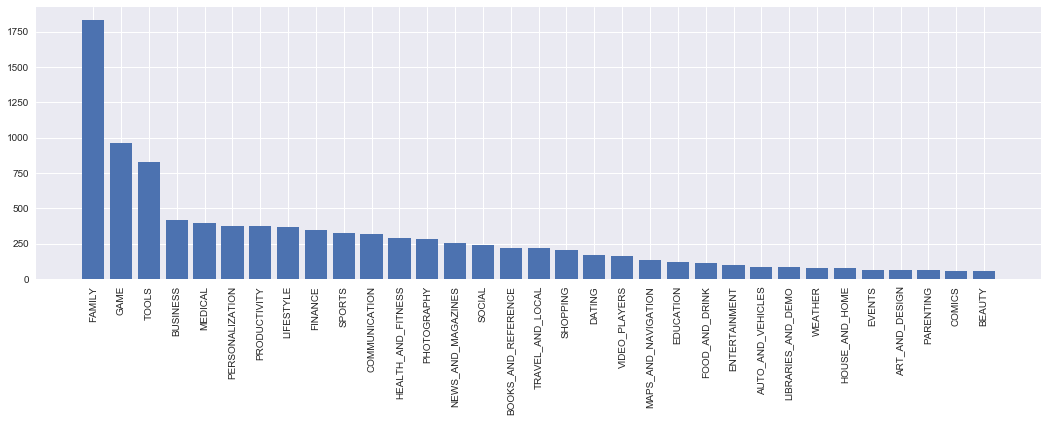

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Número de categorías únicas
num_categories = len(apps["Category"].unique())
print('Número de categorías = ', num_categories)

# Contamos el número de aplicaciones para cada categoría y las ordenamos en forma descendente
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

# Generamos gráfico
fig, ax = plt.subplots(figsize=(18,5))

ax.bar(
        num_apps_in_category.index, # index = nombre de cada categoria
        num_apps_in_category.values # value = cantidad de apps
)

plt.xticks(rotation='vertical')
plt.show()

### Distribución de las calificaciones

Después de observar la la participación de mercado para cada categoría, veamos cómo funcionan todas estas aplicaciones en promedio. Las calificaciones de las aplicaciones (en una escala de 1 a 5) afectan la capacidad de detección, la conversión de aplicaciones y la imagen general de la marca de la compañía. Las clasificaciones son un indicador clave de rendimiento de una aplicación.

Nos encontraremos que el volumen promedio de calificaciones en todas las categorías de aplicaciones es de 4,17. El diagrama del histograma está sesgado a la derecha, lo que indica que la mayoría de las aplicaciones están altamente calificadas, con solo unas pocas excepciones en las aplicaciones de baja calificación.

Calificación promedio de las apps =  4.173243045387998


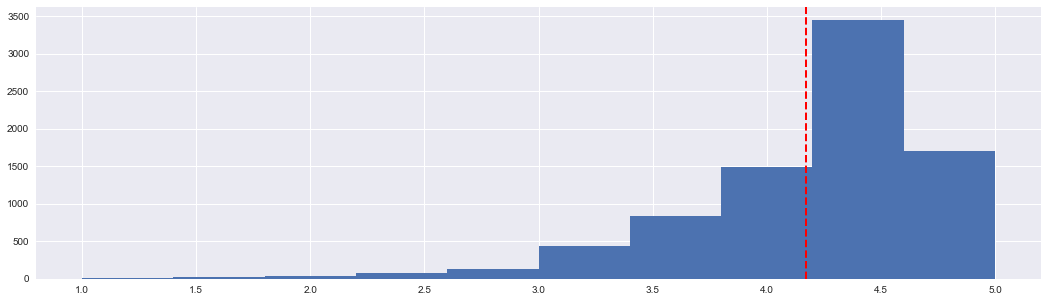

In [4]:
# Calificación promedio de las apps
avg_app_rating = apps["Rating"].mean()
print('Calificación promedio de las apps = ', avg_app_rating)

# Distribución de aplicaciones según su calificación
fig, ax = plt.subplots(figsize=(18,5))
ax.hist(apps["Rating"].dropna(), bins=10)

# Línea punteada vertical para indicar la calificación promedio 
plt.axvline(avg_app_rating, color='r', linestyle='dashed', linewidth=2)

plt.show()

### Tamaño y precio de una app
Examinemos ahora el tamaño y el precio de las aplicaciones. Con respecto al tamaño, si la app es demasiado grande, puede ser difícil y/o costoso para los usuarios descargarla. Los tiempos grandes de descarga pueden desalentar a los usuarios incluso antes de experimentar su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad finita de espacio en disco. Respecto al precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o de bajo costo. Estos problemas se agravan si su mercado objetivo se encuentra en países en vias de desarrollo, especialmente debido a las velocidades de internet, el poder adquisitivo y los tipos de cambio.

¿Cómo podemos idear estrategias para dimensionar y poner precio a nuestra aplicación?

* ¿El tamaño de una aplicación afecta su calificación?
* ¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones livianas?
* ¿El precio de una aplicación afecta su calificación?
* ¿Los usuarios siempre prefieren aplicaciones gratuitas a aplicaciones pagas?

Encontraremos que la mayoría de las aplicaciones mejor calificadas (calificación superior a 4) varían entre 2 a 20 MB. También encontremos que la gran mayoría de las aplicaciones cuestan menos de u$s 10.

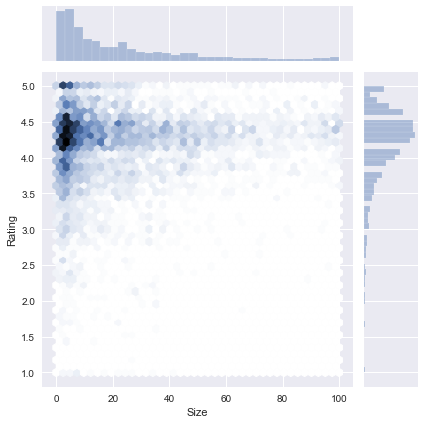

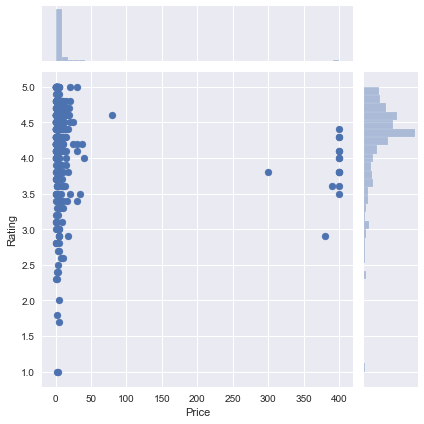

In [5]:
import seaborn as sns
sns.set_style("darkgrid")

# Subconjunto de categorías con al menos 250 apps
large_categories = apps.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Gráfico de tamaño vs. calificación
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = 'hex')

# Subconjunto de aplicaciones pagas ('Type' == 'Paid')
paid_apps = apps[apps['Type'] == "Paid"]

# Gráfico de precio vs. calificación
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

### Relación entre precio y categoría
Ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores deben llegar a fin de mes? ¿Qué estrategias de monetización pueden usar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan principalmente en características, complejidad y plataforma.

Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para su aplicación móvil. Es importante tener en cuenta la disposición del usuario a pagar por su aplicación. Un precio incorrecto podría arruinarlo todo incluso antes de que ocurra la descarga. Los potenciales usuarios podrían verse desinteresados por lo que perciben como un costo excesivo, o podrían eliminar una aplicación que descargaron después de recibir demasiados anuncios o simplemente no obtener la utilidad esperada a cambio de su dinero.

Las diferentes categorías exigen diferentes rangos de precios. Aplicaciones simples y de uso diario, como la podría ser una aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una app de medicina altamente especializada que diagnostique a pacientes diabéticos. A continuación, veremos que las aplicaciones médicas y familiares son las más caras. ¡Algunas aplicaciones médicas llegan incluso hasta los 80 dólares! Las apps de juegos tienen un precio razonable por debajo de los 20 dólares.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


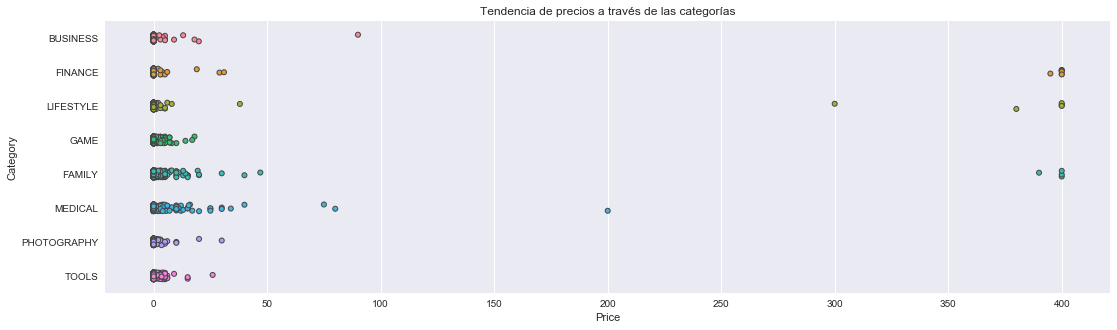

In [6]:
fig, ax = plt.subplots(figsize=(18,5))

# Seleccionamos algunas categorías populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examinamos la tendencia de precios graficando Precio vs. Categoría
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('Tendencia de precios a través de las categorías')

# Aplicaciones cuyo precio están por encima de los 200 dólares
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

### Filtremos apps basura
Parece que muchas de las aplicaciones más caras son en realidad aplicaciones "basura". Es decir, aplicaciones que realmente no tienen ningún propósito. Algunos desarrolladores de aplicaciones pueden crear una aplicación llamada *I Am Rich Premium* o *Most expensive app (H)* solo como broma o para probar sus habilidades de desarrollo de aplicaciones. Algunos desarrolladores incluso hacen esto con intenciones maliciosas e intentan ganar dinero esperando que la gente haga clic accidentalmente en comprar en su aplicación en la tienda.

Filtremos estas aplicaciones basura y volvamos a hacer nuestra visualización. La distribución de aplicaciones de menos de 20 dólares se vuelve más clara.

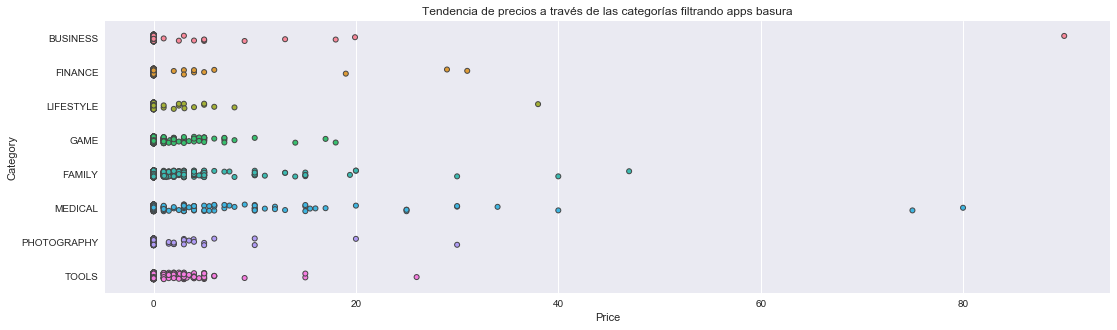

In [7]:
# Seleccionamos aplicaciones debajo de los 100 dólares
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots(figsize=(18,5))

# Examinamos Precio vs. Categoría con aplicaciones auténticas
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], 
                   jitter=True, linewidth=1)
ax.set_title('Tendencia de precios a través de las categorías filtrando apps basura')
plt.show()

### Popularidad de apps pagas vs. apps gratuitas
Para las aplicaciones en Play Store hoy en día, hay cinco tipos de estrategias de precios: gratis, freemium, de pago, paymium y suscripción. Centrémonos solo en aplicaciones gratuitas y de pago. 

Algunas características de las **aplicaciones gratuitas** son:

* Gratis para descargar.
* La principal fuente de ingresos a menudo proviene de los anuncios.
* A menudo creado por compañías que tienen otros productos y la aplicación sirve como una extensión de esos productos.
* Puede servir como herramienta para la retención de clientes, la comunicación y el servicio al cliente.

Algunas características de las **aplicaciones pagas** son:

* Los usuarios pagan una vez por la aplicación para descargarla y usarla.
* El usuario no puede realmente conocer la aplicación antes de comprarla.

¿Las aplicaciones pagas se instalan tanto como las aplicaciones gratuitas? Resulta que las aplicaciones pagas tienen un número relativamente menor de instalaciones que las aplicaciones gratuitas, ¡aunque la diferencia no es tan marcada como hubiera esperado!

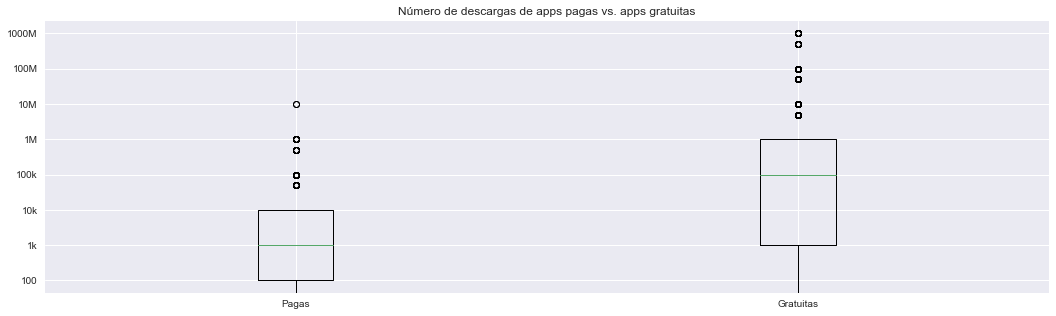

In [8]:
paid = apps[apps["Type"] == "Paid"]["Installs"]
free = apps[apps["Type"] == "Free"]["Installs"]

fig, ax = plt.subplots(figsize=(18,5))


ax.boxplot([paid, free])
ax.set_title("Número de descargas de apps pagas vs. apps gratuitas")


plt.yscale("log")
plt.xticks([1,2], ["Pagas", "Gratuitas"])
plt.yticks([100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000],
           ["100", "1k", "10k", "100k", "1M", "10M", "100M", "1000M"])
plt.show()

### Análisis de sentimiento para las reseñas de usuarios
Es posible hacer minería de datos sobre las reseñas de usuario para determinar cómo se sienten las personas acerca de su producto, marca o servicio. Esto se puede llevar a cabo utilizando una técnica llamada análisis de sentimientos. Las reseñas de los usuarios para las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral sobre esa aplicación. Por ejemplo, las palabras positivas en una reseña pueden incluir términos como 'increíble', 'amigable', 'bueno', 'genial' y 'amor'. Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.

Al graficar los puntajes de polaridad de las opiniones de los usuarios para aplicaciones pagas y gratuitas, observamos que las aplicaciones gratuitas reciben muchos comentarios duros, como lo indican los valores atípicos en el eje y negativo. Las revisiones de aplicaciones pagas nunca parecen ser extremadamente negativas. Esto puede indicar algo sobre la calidad de la aplicación, es decir, en promedio, las aplicaciones pagas son de mayor calidad que las aplicaciones gratuitas. El puntaje medio de polaridad para las aplicaciones pagas es un poco más alto que las aplicaciones gratuitas, por lo que se asemeja con nuestra observación anterior.

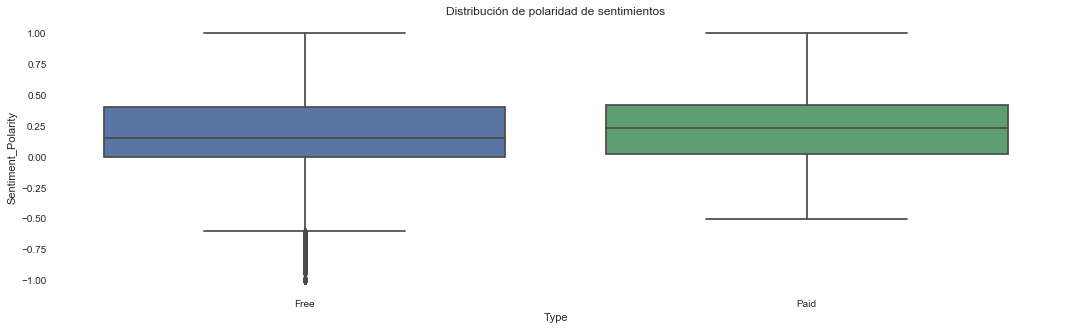

In [9]:
# Leemos el dataset user_reviews.csv
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Crucemoslo con el dataframe de apps
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Descartemos valores nulos en las columnas Sentiment y Translated_Review
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(18,5))

# Polaridad de sentimientos en las reseñas para apps pagas vs. apps gratuitas
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Distribución de polaridad de sentimientos')
plt.show()

En este artículo hemos analizamos más de diez mil aplicaciones de Google Play Store. Podríamos utilizar estos hallazgos para tomar decisiones si alguna vez desearamos crear una aplicación nosotros mismos.

<font color='gray' size='1'>Este trabajo forma parte de los proyectos propuestos en la carrera [**Data Scientist with Python**](https://www.datacamp.com/tracks/data-scientist-with-python?version=3) en Datacamp.</font>